In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import MaxNLocator, FuncFormatter
import pylab as p

In [2]:
df = pd.read_csv('maternal_mortality.csv')

In [3]:
df.rename(columns={"nhblack": "NH_BLACK", "nhwhite": "NH_WHITE", "hispanic":"HISPANIC","nhother":"NH_OTHER","lhs":"LESS_HS","hs":"HS","somecol":"SOME_COL","colplus":"COL_PLUS","sttax":"STATE_TAX"},inplace = True)

In [4]:
df.rename(columns={"state": "STATE", "year": "YEAR", "deaths":"DEATHS","cruderate":"CRUDE_RATE"},inplace = True)

In [5]:
conditions = [
    df['STATE'].values == 'Illinois',
    df['STATE'].values == 'Michigan',
    df['STATE'].values == 'Georgia',
    df['STATE'].values == 'Pennsylvania',
    df['STATE'].values == 'Texas',
    df['STATE'].values == 'New Jersey',
    df['STATE'].values == 'New York',
    df['STATE'].values == 'Florida',
    df['STATE'].values == 'California',
    df['STATE'].values == 'Ohio',
    df['STATE'].values == 'Oklahoma',
    df['STATE'].values == 'Washington',
    df['STATE'].values == 'North Carolina',
    df['STATE'].values == 'South Carolina',
    df['STATE'].values == 'Missouri',
    df['STATE'].values == 'Mississippi',
    df['STATE'].values == 'Wisconsin',
    df['STATE'].values == 'Indiana',
    df['STATE'].values == 'Virginia',
    df['STATE'].values == 'Louisiana',
    df['STATE'].values == 'Arkansas',
    df['STATE'].values == 'Arizona',
    df['STATE'].values == 'Tennessee',
    df['STATE'].values == 'Kentucky',
    df['STATE'].values == 'Kansas',
    df['STATE'].values == 'Utah',
    df['STATE'].values == 'Colorado',
    df['STATE'].values == 'Minnesota',
    df['STATE'].values == 'New Mexico',
    df['STATE'].values == 'Alabama',
    df['STATE'].values == 'Oregon',
    df['STATE'].values == 'Hawaii',
    df['STATE'].values == 'Connecticut',
    df['STATE'].values == 'Massachusetts'  
    
]

choices = [
    'IL', 
    'MI', 
    'GA',
    'PA',
    'TX',
    'NJ',
    'NY',
    'FL',
    'CA',
    'OH',
    'OK',
    'WA',
    'NC',
    'SC',
    'MO',
    'MS',
    'WI',
    'IN',
    'VA',
    'LA',
    'AR',
    'AZ',
    'TN',
    'KY',
    'KS',
    'UT',
    'CO',
    'MN',
    'NM',
    'AL',
    'OR',
    'HA',
    'CT',
    'MA'   
    
]


df['STATE'] = np.select(conditions, choices, default='NA')

In [12]:
df.head()

,STATE,YEAR,DEATHS,CRUDE_RATE,ageadjustedrate,STATE_TAX,HISPANIC,NH_BLACK,NH_WHITE,NH_OTHER,LESS_HS,HS,SOME_COL,COL_PLUS
0,AL,2005,12,1.3,1.2,42.5,0.048214,0.298214,0.621428,0.032143,0.192857,0.357143,0.233929,0.216071
1,AL,2016,30,3.1,3.2,67.5,0.050193,0.266409,0.646718,0.036680,0.106178,0.318533,0.277992,0.297297
2,AZ,2008,11,0.9,0.8,200.0,0.399777,0.021158,0.459911,0.119154,0.168152,0.345212,0.249443,0.237194
3,AZ,2010,14,1.1,1.2,200.0,0.377382,0.038119,0.470140,0.114358,0.160102,0.321474,0.298602,0.219822
4,AZ,2011,12,0.9,0.9,200.0,0.347826,0.020531,0.442029,0.189613,0.164251,0.336956,0.274155,0.224638


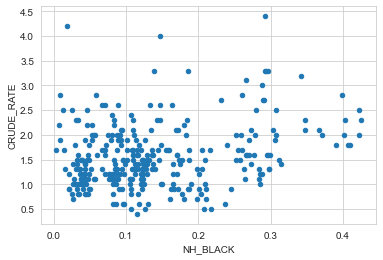

In [14]:
df.plot.scatter(x='NH_BLACK', y='CRUDE_RATE')

(2003.0, 2016.0)

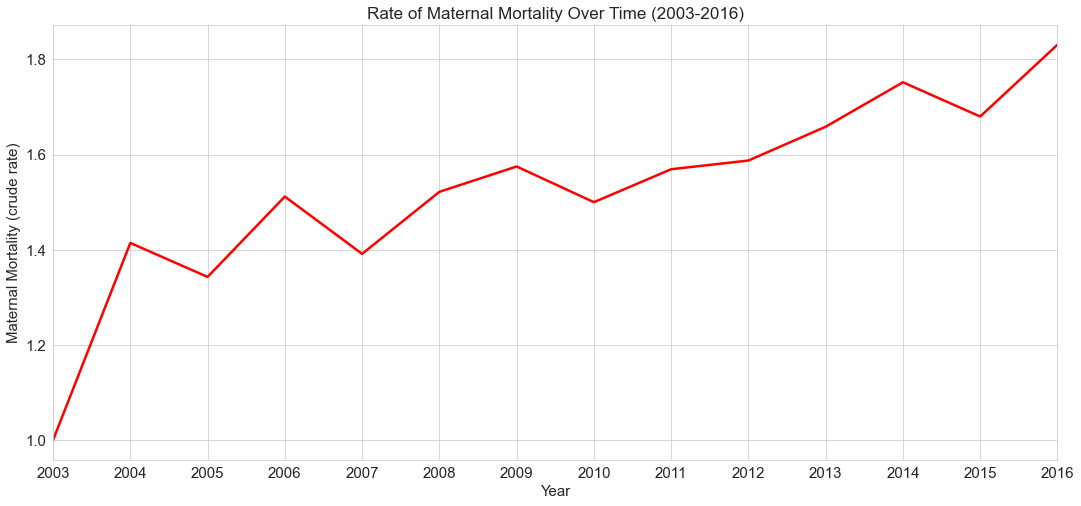

In [6]:
# Set up the defaults
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
# Plotting the data

ax = sns.lineplot(x = 'YEAR', y = 'CRUDE_RATE', data = df,  color = 'red',lw = 2.5,err_style = None)

# Sets title 
plt.title('Rate of Maternal Mortality Over Time (2003-2016)', fontsize = 17)

# Sets x label
plt.xlabel('Year', fontsize = 15)

# Sets y label
plt.ylabel('Maternal Mortality (crude rate)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlim(2003, 2016)

No handles with labels found to put in legend.


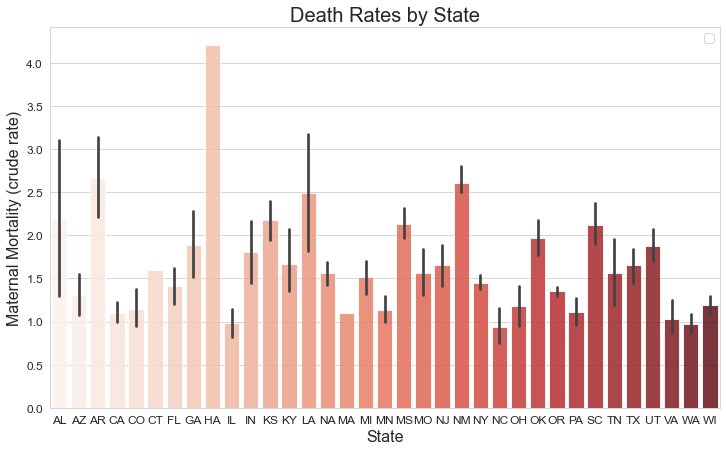

In [7]:
plt.figure(figsize = (12, 7))

ax = sns.barplot(x = df['STATE'], y = df['CRUDE_RATE'], palette = "Reds", alpha = 0.85)

plt.title("Death Rates by State", fontsize = 20)
plt.xlabel("State", fontsize = 16)
plt.ylabel("Maternal Mortality (crude rate)", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'CRUDE_RATE~STATE_TAX+STATE+YEAR+HISPANIC+NH_BLACK+NH_WHITE+LESS_HS+HS+COL_PLUS'
model = ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CRUDE_RATE   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     11.54
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.67e-40
Time:                        14:54:11   Log-Likelihood:                -145.77
No. Observations:                 315   AIC:                             377.5
Df Residuals:                     272   BIC:                             538.9
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -145.7664     29.653     -4.916      0.000    -204.145     -87.388
STATE[T.AR]     0.2596      0.413      0.629      0.530      -0.554       1.073
STATE[T.AZ]    -1.3186      0.801     -1.646      0.101      -2.896       0.258
STATE[T.CA]    -1.6468      0.934     -1.763      0.079      -3.486       0.192
STATE[T.CO]    -1.9560      0.645     -3.031      0.003      -3.227      -0.685
STATE[T.CT]    -0.5178      0.739     -0.700      0.484      -1.974       0.938
STATE[T.FL]    -0.9792      0.528     -1.854      0.065      -2.019       0.061
STATE[T.GA]    -0.2762      0.355     -0.777      0.438      -0.976       0.423
STATE[T.HA]     3.6566      1.562      2.342      0.020       0.582       6.731
STATE[T.IL]    -1.4128      0.498     -2.839      0.005      -2.393      -0.433
STATE[T.IN]    -0.9520      0.481     -1.978      0.049      -1.899      -0.004
STATE[T.KS]    -0.3993      0.557     -0.716      0.474      -1.497       0.698
STATE[T.KY]    -1.1121      0.509     -2.185      0.030      -2.114      -0.110
STATE[T.LA]     0.4123      0.330      1.251      0.212      -0.236       1.061
STATE[T.MA]    -1.1794      0.725     -1.627      0.105      -2.607       0.248
STATE[T.MI]    -0.6006      0.443     -1.356      0.176      -1.472       0.271
STATE[T.MN]    -1.2009      0.584     -2.058      0.041      -2.350      -0.052
STATE[T.MO]    -1.1643      0.449     -2.592      0.010      -2.049      -0.280
STATE[T.MS]     0.3105      0.385      0.806      0.421      -0.448       1.069
STATE[T.NA]    -0.2836      0.463     -0.612      0.541      -1.196       0.628
STATE[T.NC]    -1.5089      0.380     -3.974      0.000      -2.256      -0.761
STATE[T.NJ]    -0.2832      0.630     -0.450      0.653      -1.523       0.956
STATE[T.NM]    -0.1366      1.047     -0.130      0.896      -2.197       1.924
STATE[T.NY]    -0.4923      0.543     -0.907      0.365      -1.561       0.576
STATE[T.OH]    -1.1671      0.436     -2.679      0.008      -2.025      -0.309
STATE[T.OK]    -0.3705      0.600     -0.617      0.538      -1.552       0.811
STATE[T.OR]    -1.3814      0.633     -2.181      0.030      -2.628      -0.135
STATE[T.PA]    -1.3000      0.475     -2.737      0.007      -2.235      -0.365
STATE[T.SC]    -0.1585      0.323     -0.491      0.624      -0.794       0.477
STATE[T.TN]    -0.9518      0.396     -2.405      0.017      -1.731      -0.173
STATE[T.TX]    -1.2196      0.803     -1.519      0.130      -2.800       0.361
STATE[T.UT]    -0.7961      0.614     -1.297      0.196      -2.005       0.413
STATE[T.VA]    -1.4088      0.465     -3.029      0.003      -2.324      -0.493
STATE[T.WA]    -1.1189      0.619     -1.806      0.072      -2.338       0.101
STATE[T.WI]    -1.1478      0.542     -2.117      0.035      -2.215      -0.081
STATE_TAX      -0.0023      0.001     -3.29